In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/GSCM/building_taipei_label.xlsx - Sheet 1.csv')

# Number of observations and variables
print(data.shape)
# Overview dataset
data.head()

(4377, 10)


,c0101,c0129_label,c0162_label,age_Category_label,c0121_Category_label,c0118_label,c0179_label,c0122_label,c0158_label,area_label
0,251,0,1,6,3,0,1,0,0,0
1,252,0,1,5,1,1,1,1,0,0
2,253,1,0,5,1,2,1,1,0,0
3,254,0,1,5,2,1,1,1,0,0
4,288,0,1,7,1,0,1,1,0,1


In [ ]:
#data['content'] = data.drop('c0101')
labels = np.array(data['c0101'])
data=data.iloc[:,1:9]
#data=pd.DataFrame(data)
data.head()

,c0129_label,c0162_label,age_Category_label,c0121_Category_label,c0118_label,c0179_label,c0122_label,c0158_label
0,0,1,6,3,0,1,0,0
1,0,1,5,1,1,1,1,0
2,1,0,5,1,2,1,1,0
3,0,1,5,2,1,1,1,0
4,0,1,7,1,0,1,1,0


In [ ]:
from scipy.cluster.hierarchy import fcluster, single, complete, average, ward, dendrogram

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(data)
print

<function print>

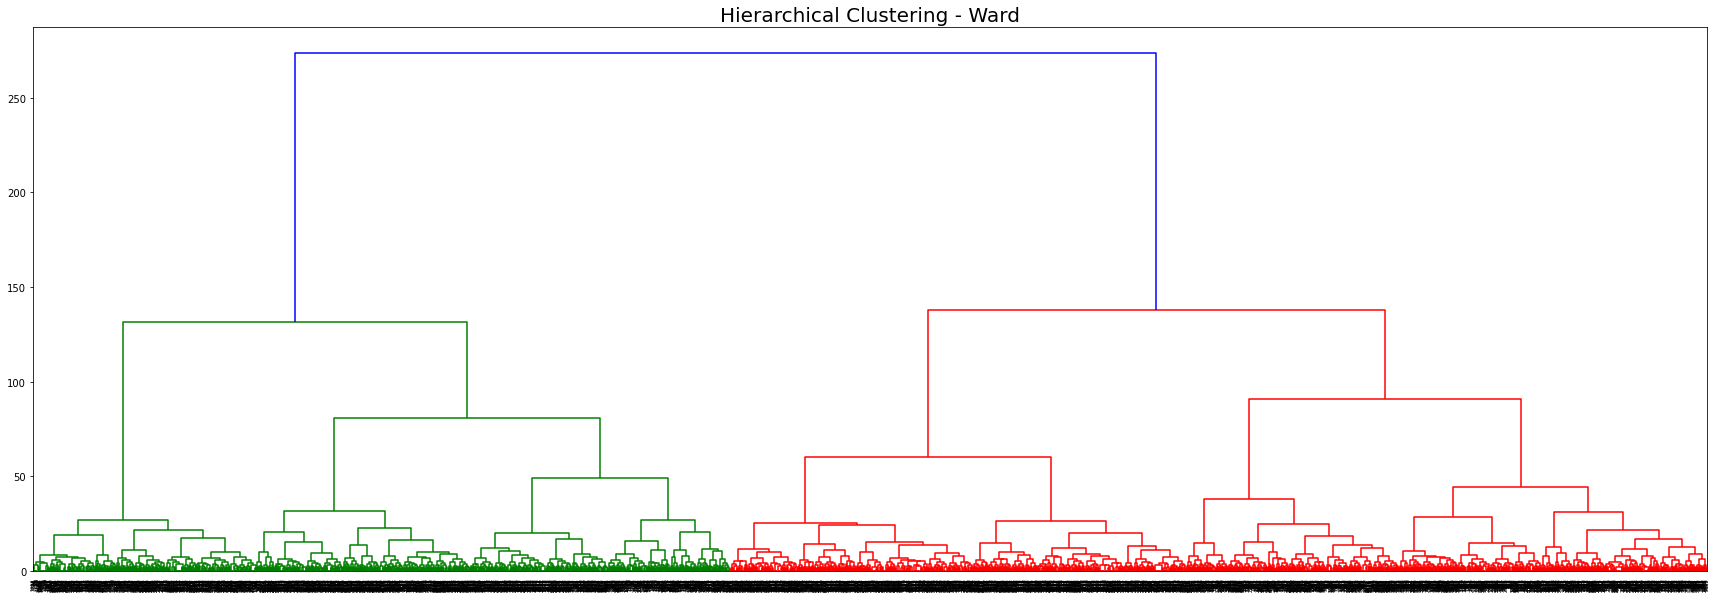

In [ ]:
linkage_matrix_ward = ward(data) 

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Ward', fontsize=20)
dn_ward = dendrogram(linkage_matrix_ward);


In [ ]:
plt.savefig('/content/drive/My Drive/GSCM/cluster_ward.png', dpi=200)

<Figure size 432x288 with 0 Axes>

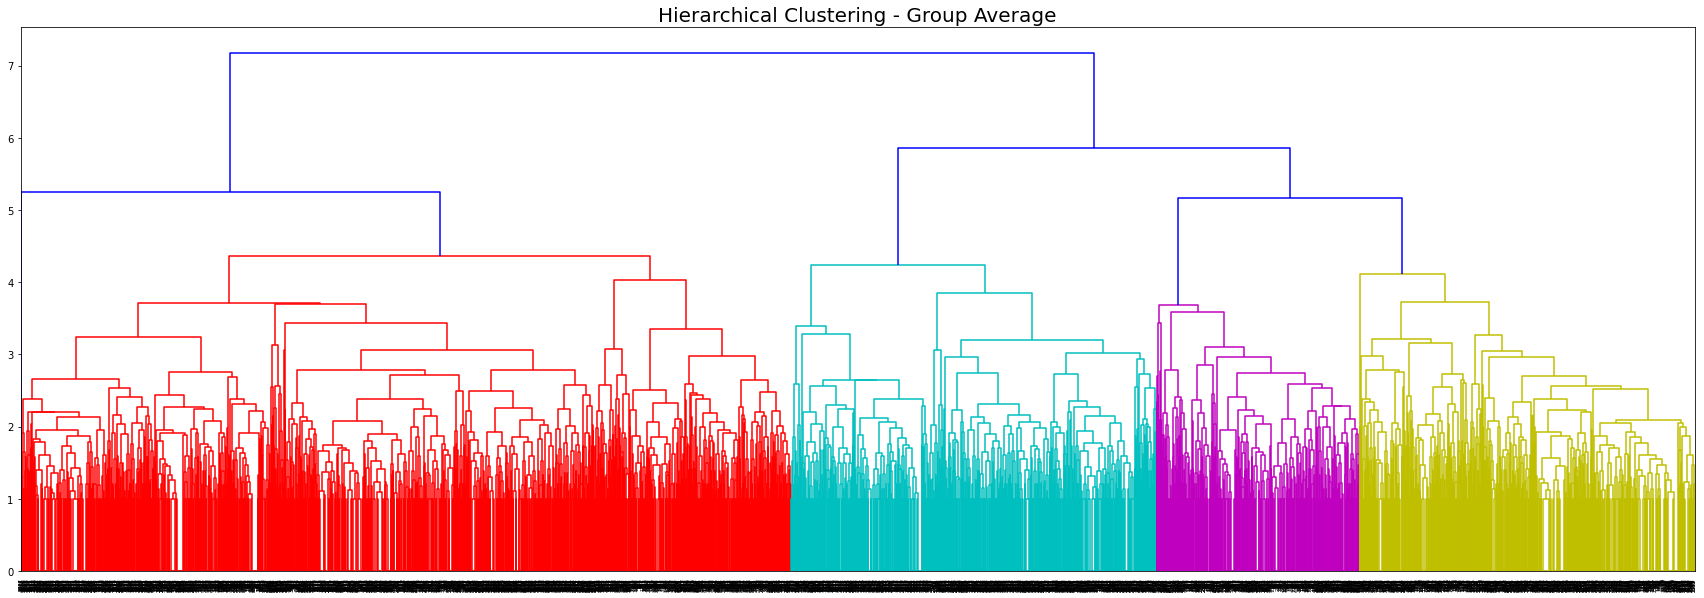

In [ ]:
linkage_matrix_avg = average(data)

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Group Average', fontsize=20)
dn_avg = dendrogram(linkage_matrix_avg);
plt.savefig('/content/drive/My Drive/GSCM/cluster_avg.png', dpi=200)

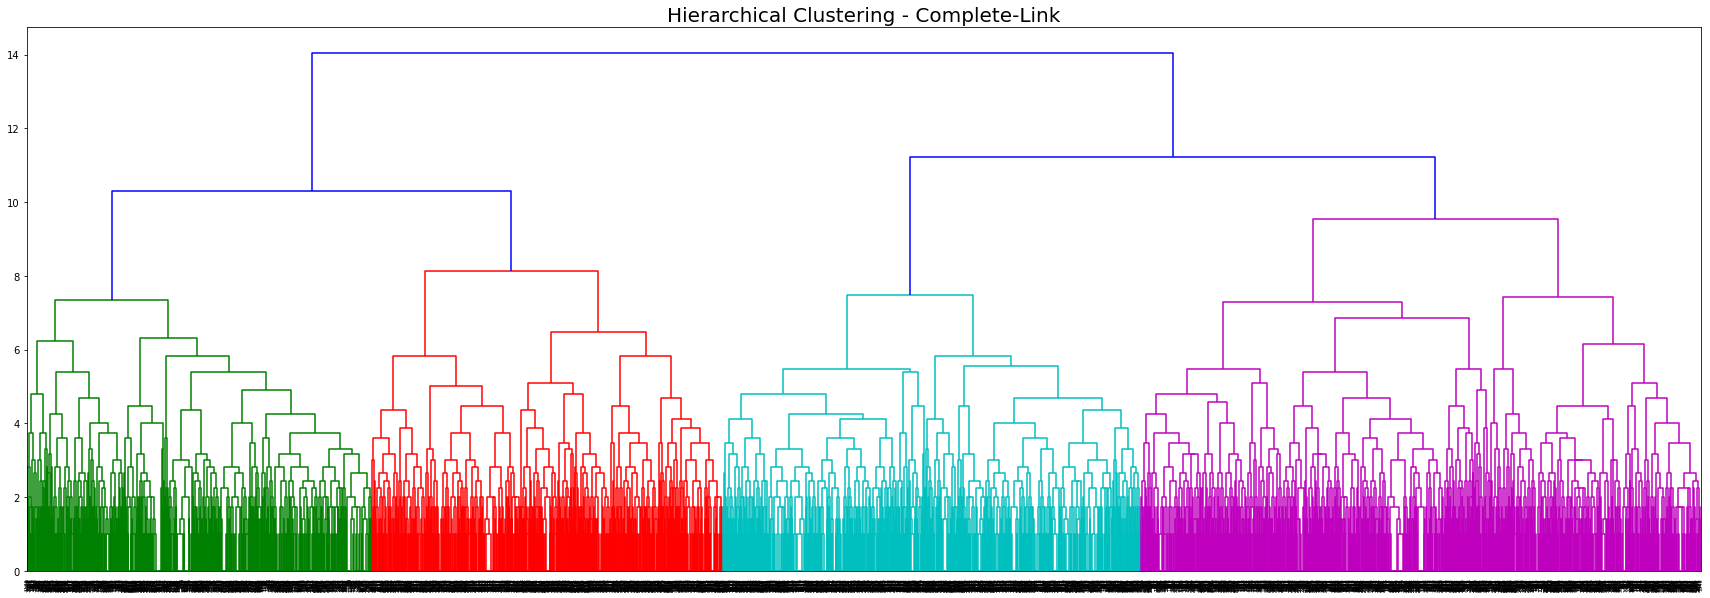

In [ ]:
linkage_matrix_complete = complete(data)

# plot
plt.subplots(figsize=(30, 10)) # set size
plt.title('Hierarchical Clustering - Complete-Link', fontsize=20)
dn_complete = dendrogram(linkage_matrix_complete);
plt.savefig('/content/drive/My Drive/GSCM/cluster_cpt.png', dpi=200)

In [ ]:
linkage_matrix_ward = ward(data) 
linkage_matrix_avg = average(data)
linkage_matrix_complete = complete(data)

In [ ]:
# Set a threshold
k = 3
kc = 4
kg = 4
kw = 4

# Single-link
# cluster_single = fcluster(linkage_matrix_single,k,criterion='maxclust')
# df['cluster_single'] = cluster_single

# Complete-link
cluster_complete_3 = fcluster(linkage_matrix_complete,k,criterion='maxclust')
data['cluster_complete_3'] = cluster_complete_3
cluster_complete_5 = fcluster(linkage_matrix_complete,kc,criterion='maxclust')
data['cluster_complete_5'] = cluster_complete_5

# Group-average
cluster_avg_3 = fcluster(linkage_matrix_avg,k,criterion='maxclust')
data['cluster_avg_3'] = cluster_avg_3
cluster_avg_6 = fcluster(linkage_matrix_avg,kg,criterion='maxclust')
data['cluster_avg_6'] = cluster_avg_6

# Ward
cluster_ward_3 = fcluster(linkage_matrix_ward,k,criterion='maxclust')
data['cluster_ward_3'] = cluster_ward_3
cluster_ward_4 = fcluster(linkage_matrix_ward,kw,criterion='maxclust')
data['cluster_ward_4'] = cluster_ward_4

In [ ]:
data.to_csv("/content/drive/My Drive/GSCM/hierarchical_textcluster_TPE_DecisionTree.csv")